In [1]:
from PIL import Image, ImageFilter, ImageDraw, ImageFont

im = Image.open("data/Blender_Suzanne1.jpg")
im.show()

In [3]:

im1 = Image.open("data/rocket.jpg")
im2 = Image.open("data/lena.jpg")

im1.paste(im2)
im1.save("data/rocket_pillow_paste.jpg", quality=95)
im1.show()

In [4]:
im1 = Image.open("data/rocket.jpg")
im2 = Image.open("data/lena.jpg")

back_im = im1.copy()
back_im.paste(im2)
back_im.show()

In [5]:
help(im1.copy)

Help on method copy in module PIL.Image:

copy() method of PIL.JpegImagePlugin.JpegImageFile instance
    Copies this image. Use this method if you wish to paste things
    into an image, but still retain the original.
    
    :rtype: :py:class:`~PIL.Image.Image`
    :returns: An :py:class:`~PIL.Image.Image` object.



In [6]:
back_im = im1.copy()
# 貼り付ける位置を指定
back_im.paste(im2, (100, 50))
back_im.show()

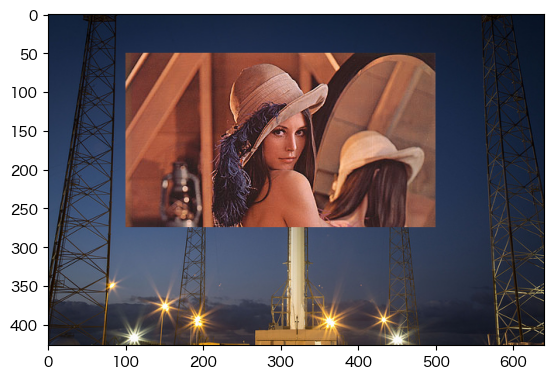

In [7]:
import matplotlib.pyplot as plt
plt.imshow(back_im)

In [8]:
help(Image.new)

Help on function new in module PIL.Image:

new(mode, size, color=0)
    Creates a new image with the given mode and size.
    
    :param mode: The mode to use for the new image. See:
       :ref:`concept-modes`.
    :param size: A 2-tuple, containing (width, height) in pixels.
    :param color: What color to use for the image.  Default is black.
       If given, this should be a single integer or floating point value
       for single-band modes, and a tuple for multi-band modes (one value
       per band).  When creating RGB images, you can also use color
       strings as supported by the ImageColor module.  If the color is
       None, the image is not initialised.
    :returns: An :py:class:`~PIL.Image.Image` object.



In [13]:
# マスクの生成，これを顔認識でやりたい
mask_im = Image.new("L", im2.size, 0)
draw = ImageDraw.Draw(mask_im)
draw.ellipse((140, 50, 260, 170), fill=255)
#plt.imshow(mask_im)
mask_im.show()

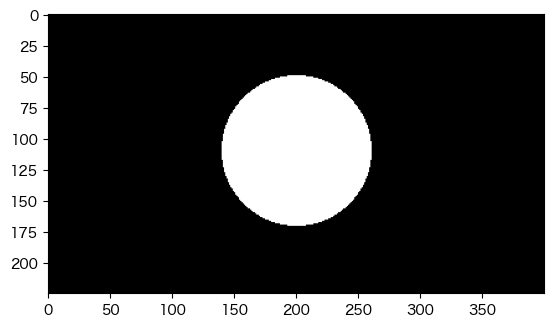

In [15]:
plt.imshow(mask_im, cmap="gray")

In [14]:
help(plt.imshow)

Help on function imshow in module matplotlib.pyplot:

imshow(X, cmap=None, norm=None, *, aspect=None, interpolation=None, alpha=None, vmin=None, vmax=None, origin=None, extent=None, interpolation_stage=None, filternorm=True, filterrad=4.0, resample=None, url=None, data=None, **kwargs)
    Display data as an image, i.e., on a 2D regular raster.
    
    The input may either be actual RGB(A) data, or 2D scalar data, which
    will be rendered as a pseudocolor image. For displaying a grayscale
    image set up the colormapping using the parameters
    ``cmap='gray', vmin=0, vmax=255``.
    
    The number of pixels used to render an image is set by the Axes size
    and the *dpi* of the figure. This can lead to aliasing artifacts when
    the image is resampled because the displayed image size will usually
    not match the size of *X* (see
    :doc:`/gallery/images_contours_and_fields/image_antialiasing`).
    The resampling can be controlled via the *interpolation* parameter
    and/or 

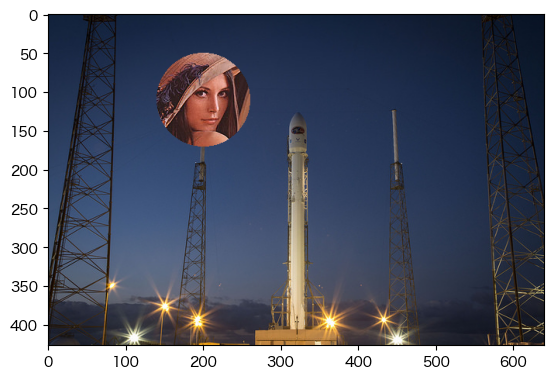

In [16]:
back_im = im1.copy()
back_im.paste(im2, (0, 0), mask_im)
plt.imshow(back_im)

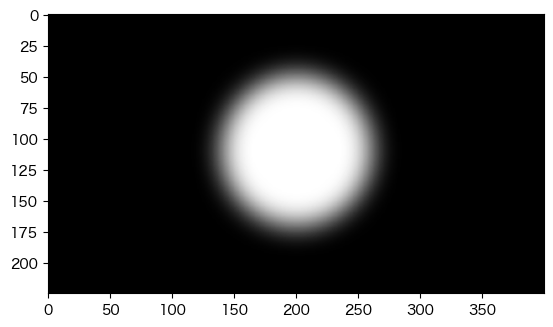

In [18]:
mask_im_blur = mask_im.filter(ImageFilter.GaussianBlur(10))
mask_im_blur.save("data/mask_circle_blur.jpg", quality=95)
plt.imshow(mask_im_blur, cmap="gray")

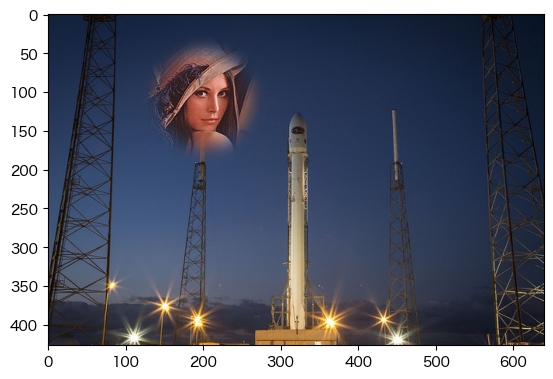

In [19]:
back_im = im1.copy()
back_im.paste(im2, (0, 0), mask_im_blur)
plt.imshow(back_im)

In [20]:
help(back_im.paste)

Help on method paste in module PIL.Image:

paste(im, box=None, mask=None) method of PIL.Image.Image instance
    Pastes another image into this image. The box argument is either
    a 2-tuple giving the upper left corner, a 4-tuple defining the
    left, upper, right, and lower pixel coordinate, or None (same as
    (0, 0)). See :ref:`coordinate-system`. If a 4-tuple is given, the size
    of the pasted image must match the size of the region.
    
    If the modes don't match, the pasted image is converted to the mode of
    this image (see the :py:meth:`~PIL.Image.Image.convert` method for
    details).
    
    Instead of an image, the source can be a integer or tuple
    containing pixel values.  The method then fills the region
    with the given color.  When creating RGB images, you can
    also use color strings as supported by the ImageColor module.
    
    If a mask is given, this method updates only the regions
    indicated by the mask. You can use either "1", "L", "LA", "R